# Kamera


In [1]:
import numpy as np
from pylab import *
import cv2
%matplotlib inline

ModuleNotFoundError: No module named 'cv2'

# Grauwertkeiles

## Unser Bild


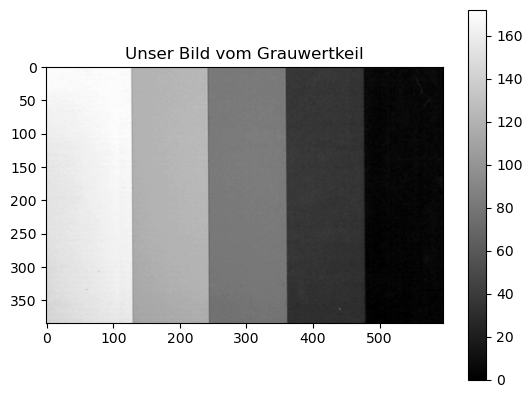

In [ ]:
grauwertkeil_unser = cv2.imread("Kamera Messungen/grau1.png")
grauwertkeil_unser = cv2.cvtColor(grauwertkeil_unser, cv2.COLOR_RGB2GRAY)[10:460, 0:600]
figure()
imshow(grauwertkeil_unser, cmap="gray")
colorbar()
title('Unser Bild vom Grauwertkeil')
show()

## Original


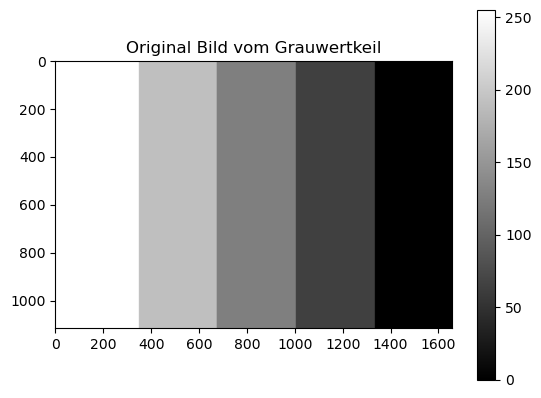

In [ ]:
grauwertkeil_orignal = cv2.imread("Kamera Messungen/original_grau.png")
grauwertkeil_orignal = cv2.cvtColor(grauwertkeil_orignal, cv2.COLOR_RGB2GRAY)
figure()
imshow(grauwertkeil_orignal, cmap="gray")
colorbar()
title('Original Bild vom Grauwertkeil')
show()

# Aufteilen


[161.578125   120.00848958  81.79578125  35.34979167   3.73015625]
[5.04064114 2.73059075 1.87744644 2.22769966 1.91652544]


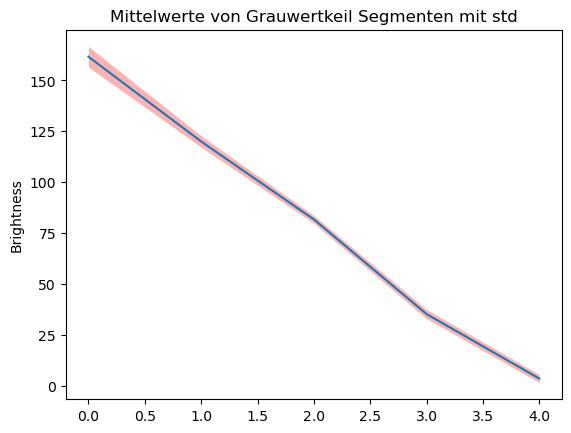

In [ ]:
teil1 = grauwertkeil_unser[:, 50:100]
teil2 = grauwertkeil_unser[:, 150:200]
teil3 = grauwertkeil_unser[:, 280:330]
teil4 = grauwertkeil_unser[:, 400:450]
teil5 = grauwertkeil_unser[:, 500:550]
teile_unser_bild = np.array([teil1, teil2, teil3, teil4, teil5])
teile_unser_bild_mean = np.array([np.mean(teil1), np.mean(teil2), np.mean(teil3), np.mean(teil4), np.mean(teil5)])
teile_unser_bild_std = np.array([np.std(teil1), np.std(teil2), np.std(teil3), np.std(teil4), np.std(teil5)])
print(teile_unser_bild_mean)
print(teile_unser_bild_std)
figure()
x = range(0, 5)
plot(x, teile_unser_bild_mean)
fill_between(x, teile_unser_bild_mean + teile_unser_bild_std, teile_unser_bild_mean - teile_unser_bild_std, alpha=0.3, color='red', linewidth=0)
title('Mittelwerte von Grauwertkeil Segmenten mit std')
ylabel('Brightness')
show()

# Dunkelbild


max=0.0


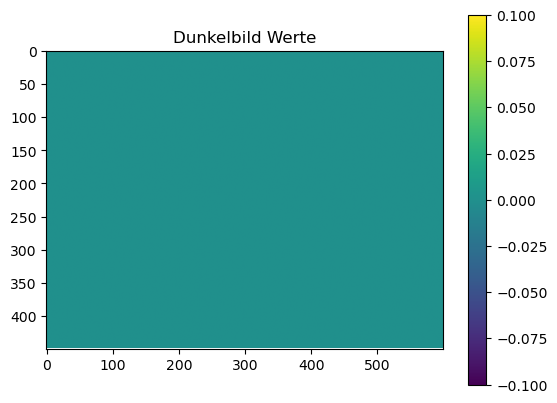

In [ ]:
def read_black_image(img_num):
    black_img = cv2.imread("Kamera Messungen/test" + str(img_num) + ".png")
    black_img = cv2.cvtColor(black_img, cv2.COLOR_BGR2GRAY)
    return black_img[10:460, 0:600]

black_images = np.array([
    read_black_image(0),
    read_black_image(1),
    read_black_image(2),
    read_black_image(3),
    read_black_image(4),
    read_black_image(5),
    read_black_image(6),
    read_black_image(7),
    read_black_image(8),
    read_black_image(9),
], dtype=np.float64)

summed_black_image = np.sum(black_images, axis=0)
mean_black_image = summed_black_image / size(black_images)

print("max=" + str(np.max(mean_black_image)))
# mean_image = mean_image / np.max(mean_image)

figure()

imshow(mean_black_image)
colorbar()

title('Dunkelbild Werte')

show()

def sub_black_image(img):
    return img - mean_black_image

Unsere Bilder bestehen nur aus 0er. Also haben wir keinerlei fehler im Dunkelbild.


# Weißbilder


In [ ]:
def read_white_image(img_num):
    white_img = cv2.imread("Kamera Messungen/testWeiss" + str(img_num) + ".png")
    white_img = cv2.cvtColor(white_img, cv2.COLOR_BGR2GRAY)
    return white_img[10:460, 0:600]

testImg = read_white_image(0)

white_images = np.array([
    read_white_image(0),
    read_white_image(1),
    read_white_image(2),
    read_white_image(3),
    read_white_image(4),
    read_white_image(5),
    read_white_image(6),
    read_white_image(7),
    read_white_image(8),
    read_white_image(9),
], dtype=np.float64)

summed_white_image = np.sum(white_images, axis=0)
mean_white_image = summed_white_image / size(white_images)

white_image = mean_white_image - mean_black_image
white_image = white_image / np.mean(white_image)

figure()
imshow(white_image)
colorbar()
title('Mittleres und Normiertes Bild von allen Weißbildern')
show()

NameError: name 'cv2' is not defined

In [ ]:
import copy

offset = 5 # Alle Dead Pixel mit Offset >= 5
# Je größer Offset wird, desto weniger Dead Pixel

weissbild_deadpix = copy.deepcopy(mean_white_image)

for i in range(len(weissbild_deadpix)):
    for j in range(len(weissbild_deadpix[0])):
        for k in range(len(weissbild_deadpix[0][0])):
            if (weissbild_deadpix[i][j][k] <= 255 - offset):
                weissbild_deadpix[i][j][k] = 0

fig3 = plt.figure(figsize=(8,8))
plt.title("Deadpixel", fontsize=18)
plt.imshow(weissbild_deadpix)


# Findung von Hot-/Stuck Pixel im Dunkelbild:

offset = 5 # Alle Hot-/Stuck Pixel mit Offset >= 5
# Je größer Offset wird, desto weniger Hot-/Stuck Pixel

dunkelbild_pix = copy.deepcopy(mean_black_image)

for i in range(len(dunkelbild_pix)):
    for j in range(len(dunkelbild_pix[0])):
        for k in range(len(dunkelbild_pix[0][0])):
            if (dunkelbild_pix[i][j][k] >= offset):
                dunkelbild_pix[i][j][k] = 255

fig3 = plt.figure(figsize=(8,8))
plt.title("Hot-/Stuckpixel", fontsize=18)
plt.imshow(dunkelbild_pix)

NameError: name 'mean_white_image' is not defined